In [500]:
import importlib
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import pipeline as pp
import stats_hc as hc

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\henri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [639]:
importlib.reload(pp)

pp.apply_pipeline(
    "../datasets/large/shuffled.csv", 
    [(pp.Valid_row(), None)],
    new_file="../datasets/large/removed_empty_rows_100k.csv",
    nrows=100000,
    progress_bar=True
)

100%|██████████| 100000/100000 [00:11<00:00, 8761.06it/s]


processed 85147 rows
finish time: 31.85272192955017


In [640]:
importlib.reload(pp)
stopwords_lst = stopwords.words('english')

pp.apply_pipeline(
    "../datasets/large/removed_empty_rows_100k.csv",
    [   (pp.Binary_labels(), 'type', 'binary_label'),
        (pp.Clean_data(), 'content'),
        (pp.Clean_author(), 'authors'),
        (pp.Clean_domain(), 'domain'),
        (pp.Tokenizer(), 'content'),
        (pp.Remove_stopwords(stopwords_lst), 'content'),
        (pp.Stem(), 'content'),
    ],
    new_file="../datasets/large/cleaned_100k.csv",
    progress_bar=True
)

 45%|████▍     | 37908/85147 [00:57<02:14, 350.93it/s]

In [ ]:
importlib.reload(hc)
Stat = hc.Statistics("../datasets/large/cleaned_100k.csv")

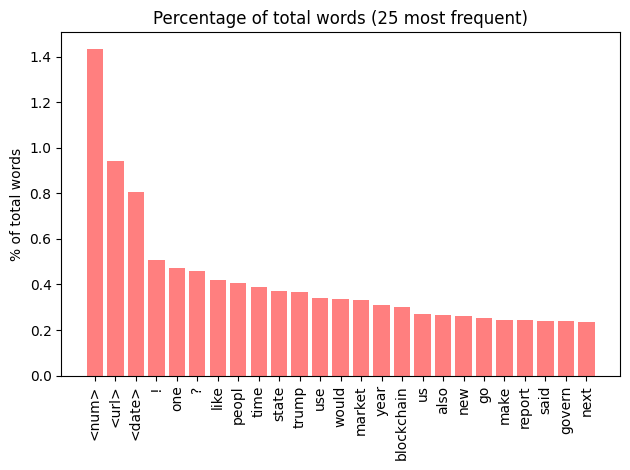

In [ ]:
Stat.barplot_word_frequency(nwords=25, percentage=True)

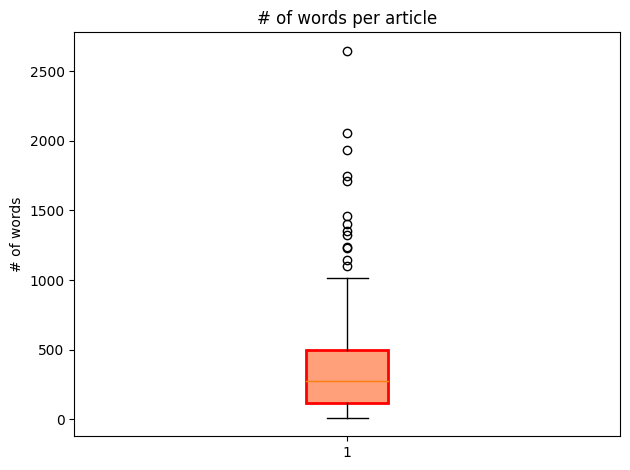

In [ ]:
Stat.boxplot_word_frequency()

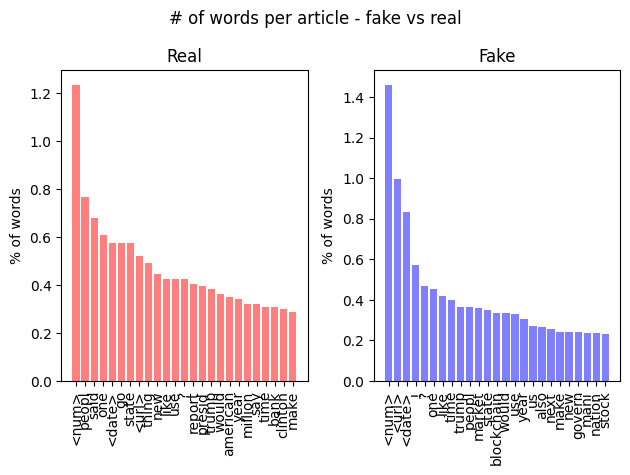

In [ ]:
Stat.barplot_word_frequency_fake_vs_real(nwords=25, binary_label="binary_label", percentage=True)

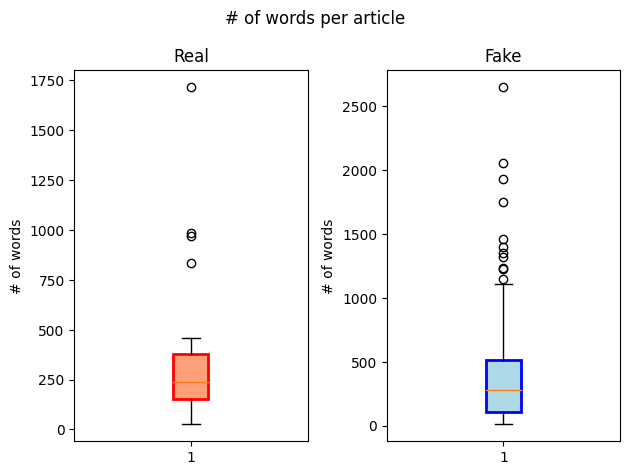

In [ ]:
Stat.boxplot_word_frequency_fake_vs_real(binary_label="binary_label")

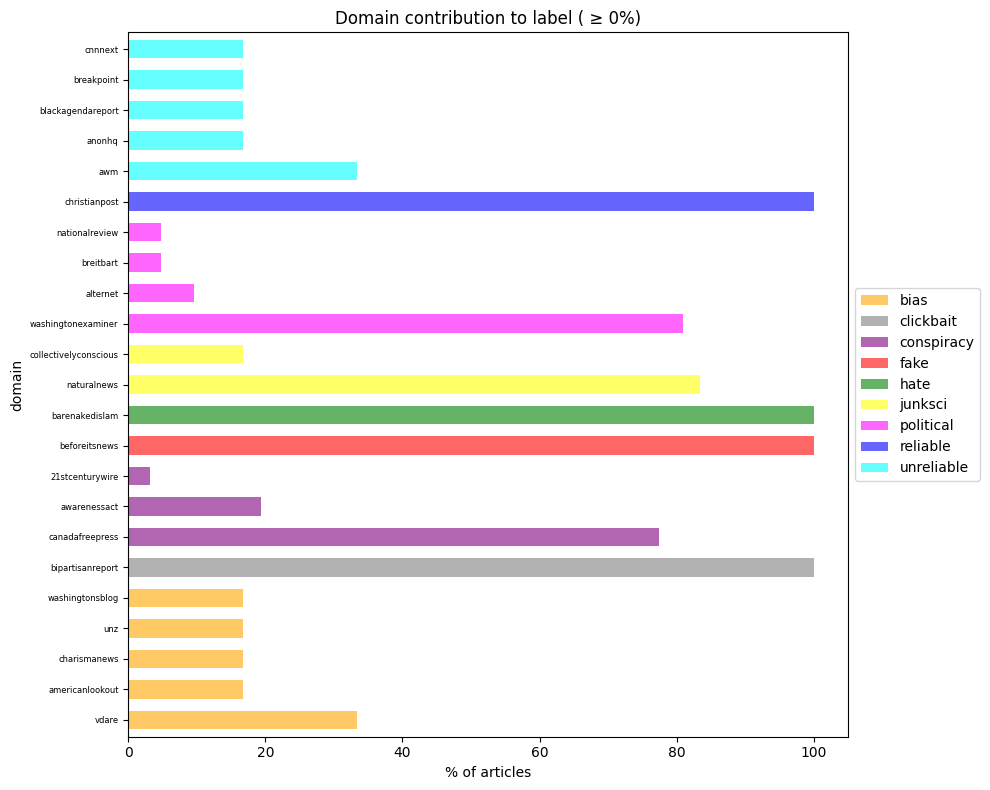

In [ ]:
Stat.barplot_domain_contribution(threshold=0, percentage=True)

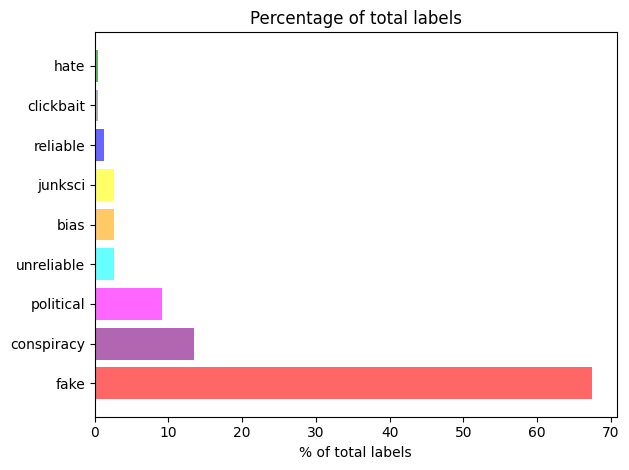

In [ ]:
Stat.barplot_type_distribution(percentage = True)

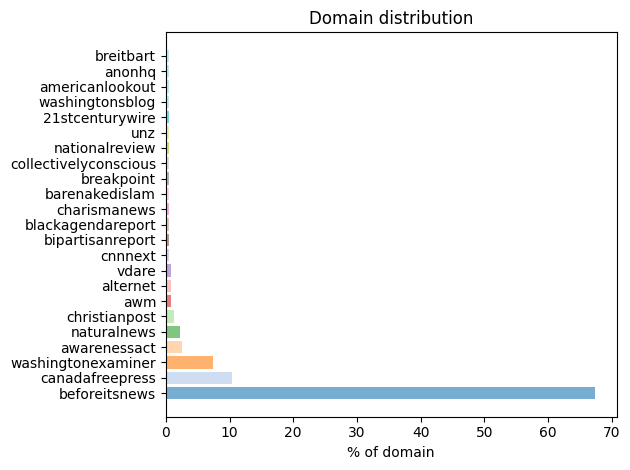

In [ ]:
Stat.barplot_domain_distribution(percentage = True)

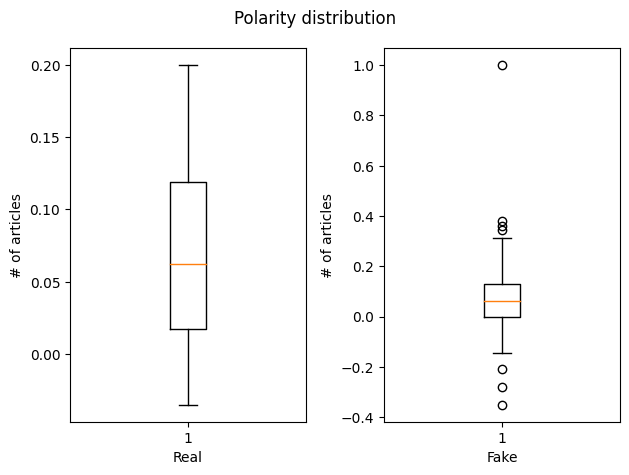

Median of Polarity real: 0.06198906356801093
Median of Polarity fake: 0.06196236559139785


In [ ]:
Stat.boxplot_polarity()

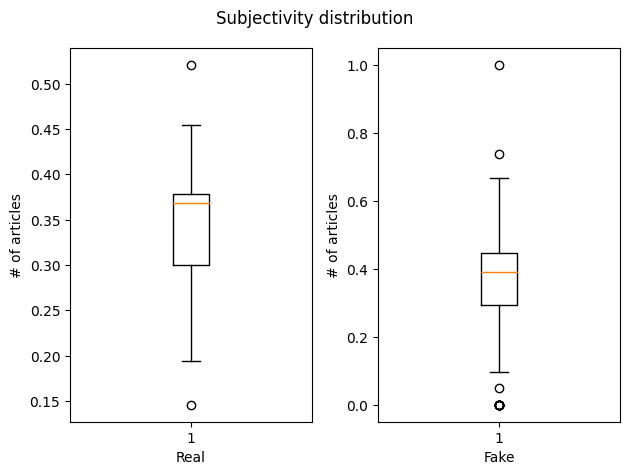

Median of Subjectivity real: 0.3684962406015037
Median of Subjectivity fake: 0.38967803030303033


In [ ]:
Stat.boxplot_subjectivity()